# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution
</div>
****

In [2]:
import numpy as np
import pandas as pd
from scipy import stats

In [3]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [4]:
# number of callbacks for black-sounding names
# sum(data[data.race=='w'].call)

In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [6]:
w = data[data.race=='w']
b = data[data.race=='b']

### 1.) What test is appropriate for this problem? Does CLT apply?

In [7]:
white_sample = len(w)
black_sample = len(b)
white_callbacks = sum(data[data.race=='w'].call)
black_callbacks = sum(data[data.race=='b'].call)

print("Sample size 'white sounding' names:", white_sample)
print("Sample size 'black sounding' names:", black_sample)
print("White callbacks: ", white_callbacks)
print("Black callbacks: ", black_callbacks)

Sample size 'white sounding' names: 2435
Sample size 'black sounding' names: 2435
White callbacks:  235.0
Black callbacks:  157.0


### 2.) What are the null and alternate hypotheses?

### 3.) Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

#### 3A.) Margin of Error

In [8]:
# Bootstrapping 
callbacks = data[['call', 'race']] #Easier dataframe to deal with
whites = callbacks[callbacks['race'] == 'w']
blacks = callbacks[callbacks['race'] == 'b']

diff = []
for i in range(10000):
    boot_whites = sum(whites['call'].sample(len(whites), replace=True) / len(whites))
    boot_blacks = sum(blacks['call'].sample(len(blacks), replace=True) / len(blacks))
    diff.append(boot_whites - boot_blacks)


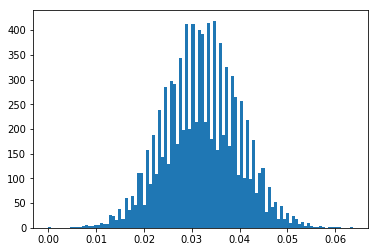

In [15]:
# Plot of bootstrapped differences
import matplotlib.pyplot as plt
plt.hist(diff, bins=100)
plt.show()

In [16]:
print('Mean:', np.mean(diff))
print('Standard Deviation:', np.std(diff))
z = stats.norm.ppf(.975)
low = round(np.mean(diff) - z * np.std(diff), 3)
high = round(np.mean(diff) + z * np.std(diff), 3)
print('Confidence Interval:', [low, high])
print('P-Value:', stats.ttest_1samp(diff,0.0)[1])

Mean: 0.032020493923989125
Standard Deviation: 0.007839146423605016
Confidence Interval: [0.017, 0.047]
P-Value: 0.0


In [11]:
# Frequentist Approach
# Margin of Error = z * sqrt(phat * (1 - phat) / n)
z = stats.norm.ppf(.975)
phat = (white_callbacks + black_callbacks) / (white_sample + black_sample)
margin_of_error = z * np.sqrt(phat * (1 - phat) / (white_sample + black_sample))
print(round(margin_of_error, 3))

0.008


#### 3B.) Confidence Interval

In [12]:
# Frequentist Approach

# Find difference between white sampling callback rate and black sounding callback rate, add and subtract by margin of error
white_rate = white_callbacks / white_sample
black_rate = black_callbacks / black_sample

print(round((white_rate - black_rate) * 100, 3), '% plus or minus', round(100 * margin_of_error, 3), '%')

3.203 % plus or minus 0.764 %


#### 3C.) P-Value

In [13]:
# Frequentist Approach
from statsmodels.stats.proportion import proportions_ztest
counts = np.array([white_callbacks , black_callbacks])
nobs = np.array([white_sample, black_sample])
stat, pval = proportions_ztest(counts, nobs)
print('{0:0.8f}'.format(pval))

0.00003984


### 4.) Write a story describing the statistical significance in the context or the original problem.

In [14]:
# Write a paragraph here about conclusion and findings

### 5.) Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?